In [161]:
import os
from sklearn.metrics import r2_score
import pwlf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
%matplotlib inline
import missingno as msno
np.random.seed(19)
from matplotlib.pyplot import figure
data_directory = '/work2/05067/nagyz/austin_energy/data/'
filepaths = [os.path.join(data_directory,f) for f in os.listdir(data_directory) if f.endswith('.csv')]
from datetime import datetime 
from Graphs import load_data,load_graph_kwh,yearly_graph_kwh,load_graph_count,monthly_graph_kwh,daily_graph_kwh
from Graphs import load_graph_kwh_and_count,yearly_graph_kwh_and_count,monthly_graph_kwh_and_count,daily_graph_kwh_and_count
from agg_and_heatmap_functions import length,prav3,prav2,prav1,dinostorm,plot_aggraph,heatmap,finalheatmap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, SGDRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [162]:
"""for i, row in tqdm(id_list.iterrows()):
    point = row['Service Point']
    example_ts = pd.read_csv('/work2/05067/nagyz/austin_energy/data/_4_exports_UT/UT_sID_'+str(point)+'_dates_2017.01.01_through_2021.10.01.csv')
    example_ts.index = pd.to_datetime(example_ts.index)
    example_ts = example_ts.resample('H').mean()
    example_ts = example_ts.drop([f'{point} count Value'], axis = 1)
    example_ts = example_ts['2021-02':'2021-02']
    
    
    # condition with energy that outage happen
    energy = example_ts.iloc[:, 0]
    Q3 = np.quantile(energy, 1)
    Q1 = np.quantile(energy, 0.1)
    energy_con = ~energy['2021-02-12':'2021-02-20'].between(Q1, Q3)

    meter_used = example_ts.iloc[:, 1]
    Q3 = np.quantile(meter_used, 1)
    Q1 = np.quantile(meter_used, 0.1)
    meter_used_con = ~meter_used['2021-02-12':'2021-02-20'].between(Q1, Q3)
    
    happen = len(example_ts['2021-02-12':'2021-02-20'][(energy_con) | (meter_used_con)])
    total = len(example_ts['2021-02-12':'2021-02-20'])
    percent = round(happen / total * 100, 5)
    id_list.loc[i, 'is_effected'] = 1 if percent != 0.0 else 0
    id_list.loc[i, 'temporal_percentage'] = percent"""

"for i, row in tqdm(id_list.iterrows()):\n    point = row['Service Point']\n    example_ts = pd.read_csv('/work2/05067/nagyz/austin_energy/data/_4_exports_UT/UT_sID_'+str(point)+'_dates_2017.01.01_through_2021.10.01.csv')\n    example_ts.index = pd.to_datetime(example_ts.index)\n    example_ts = example_ts.resample('H').mean()\n    example_ts = example_ts.drop([f'{point} count Value'], axis = 1)\n    example_ts = example_ts['2021-02':'2021-02']\n    \n    \n    # condition with energy that outage happen\n    energy = example_ts.iloc[:, 0]\n    Q3 = np.quantile(energy, 1)\n    Q1 = np.quantile(energy, 0.1)\n    energy_con = ~energy['2021-02-12':'2021-02-20'].between(Q1, Q3)\n\n    meter_used = example_ts.iloc[:, 1]\n    Q3 = np.quantile(meter_used, 1)\n    Q1 = np.quantile(meter_used, 0.1)\n    meter_used_con = ~meter_used['2021-02-12':'2021-02-20'].between(Q1, Q3)\n    \n    happen = len(example_ts['2021-02-12':'2021-02-20'][(energy_con) | (meter_used_con)])\n    total = len(example_ts

In [163]:
data_dir = './data/'
export_dir = os.path.join(data_dir, '_4_exports_UT')
id_list = pd.read_csv('temporal_percentage1.csv')
id_list.drop('Unnamed: 0',axis=1,inplace=True)
other_daily=pd.read_csv('other_daily.csv')
other_hourly=pd.read_csv('other_hourly.csv')
other_weekly=pd.read_csv('other_weekly.csv')
residential_daily=pd.read_csv('residential_daily.csv')
residential_hourly=pd.read_csv('residential_hourly.csv')
residential_weekly=pd.read_csv('residential_weekly.csv')
commerical_daily=pd.read_csv('commercial_daily.csv')
commercial_weekly=pd.read_csv('commercial_weekly.csv')
commercial_hourly=pd.read_csv('commercial_hourly.csv')


In [164]:
# RESIDENTIAL
residential_daily_praveen=pd.read_csv('residential_daily_praveen.csv')
residential_daily_praveen1=pd.read_csv('residential_daily_praveen_2ndpart of 2017.csv')
residential_daily_praveen2=pd.read_csv('residential_daily_praveen_2021 january.csv')
def convert(s):
    s=s.set_index(s[s.columns[0]])
    s.drop('Unnamed: 0',axis=1,inplace=True)
    s.index=pd.to_datetime(s.index)
    return s
a=convert(residential_daily_praveen1)
a1=convert(residential_daily_praveen)[:'2017-08-02 00:00:00+00:00']
a2=convert(residential_daily_praveen2)
a3=convert(residential_daily)
residential=pd.concat([a1,a,a3,a2],axis=0)


In [165]:
# commerical
commerical_2017=pd.read_csv('commercial_2021_new_one_part.csv')
commerical_2021=pd.read_csv('commercial_2021_new_one2021_part.csv')
b=convert(commerical_2017)
b1=convert(commerical_2021)
b2=convert(commerical_daily)
commerical=pd.concat([b,b2,b1],axis=0)

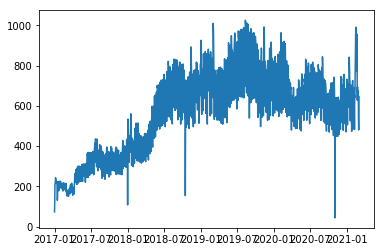

In [166]:
plt.plot(commerical)

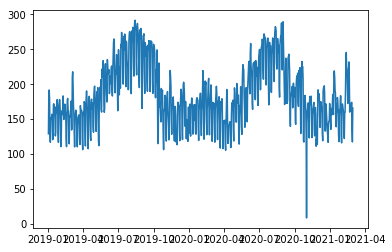

In [167]:
# OTHER
other_2017=pd.read_csv('other_2017_part.csv')
other_2021=pd.read_csv('other_2021_part.csv')
c=convert(other_2017)
c1=convert(other_2021)
c2=convert(other_daily)
other=pd.concat([c2,c1],axis=0)
plt.plot(other['2019':])

In [168]:
weather_daily=pd.read_csv('Austin_weather_daily.csv')
weather_daily['time']=pd.to_datetime(weather_daily['time'],utc=True)
weather_daily1=weather_daily.set_index('time',drop=True)
weather_austin_daily=weather_daily1['tavg']
cool_points=weather_austin_daily[weather_austin_daily<15]['2017-01-01 00:00:00+00:00':'2021-01-31 00:00:00+00:00']
cool_points

time
2017-01-04 00:00:00+00:00     5.9
2017-01-05 00:00:00+00:00     8.6
2017-01-06 00:00:00+00:00    -1.1
2017-01-07 00:00:00+00:00    -0.9
2017-01-08 00:00:00+00:00     3.0
                             ... 
2021-01-23 00:00:00+00:00    13.8
2021-01-26 00:00:00+00:00    14.9
2021-01-27 00:00:00+00:00    12.4
2021-01-28 00:00:00+00:00     7.8
2021-01-29 00:00:00+00:00    11.8
Name: tavg, Length: 363, dtype: float64

In [169]:
# NOT UTC TIME
weather_Pred=pd.read_csv('Austin_hourly.csv')
weather_Pred['time']=pd.to_datetime(weather_Pred['time'])
weather_pred1=weather_Pred.set_index('time',drop=True)
weather_austin_hourl_pred=weather_pred1['temp']

Text(0.5, 1.0, 'other_outlier_visualization')

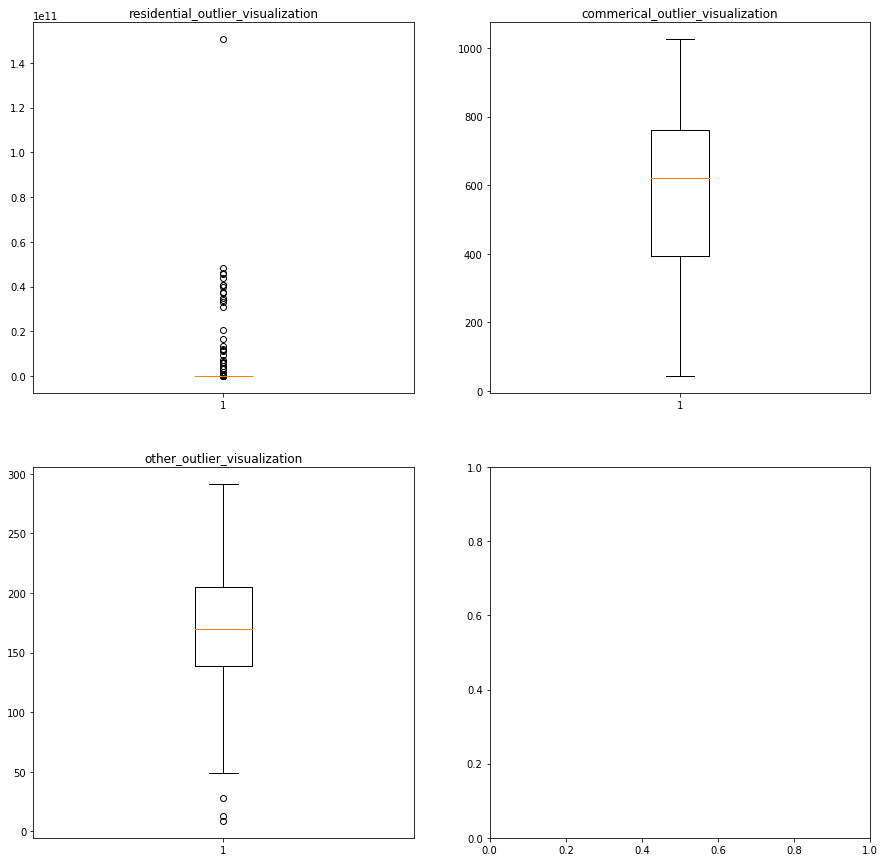

In [170]:
fig, axs = plt.subplots(2,2, figsize=(15,15))
axs[0,0].boxplot(residential['0'][:'2021-01-31 00:00:00+00:00'])
axs[0,0].set_title('residential_outlier_visualization')
axs[0,1].boxplot(commerical['0'][:'2021-01-31 00:00:00+00:00'])
axs[0,1].set_title('commerical_outlier_visualization')
axs[1,0].boxplot(other['0'][:'2021-01-31 00:00:00+00:00'])
axs[1,0].set_title('other_outlier_visualization')
# commrical has no outliers

Text(0.5, 1.0, 'new_residential_outlier_visualization')

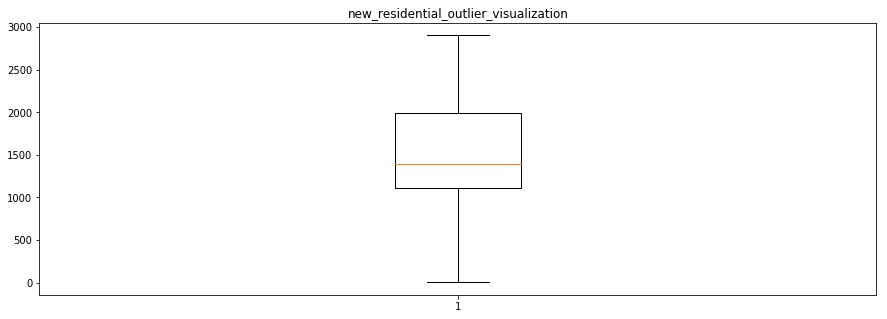

In [171]:
Q3= residential['0'].quantile(0.975)
residential1=residential[residential['0']<Q3][:'2021-01-31 00:00:00+00:00']
fig, ax1 = plt.subplots(1, figsize=(15,5))
ax1.boxplot(residential1['0'][:'2021-01-31 00:00:00+00:00'])
ax1.set_title('new_residential_outlier_visualization')

In [172]:
def make_features(dataframe,time_level):
    s=dataframe
    start_time=s.index[0]
    end_time=s.index[-1]
    example_ts=s
    example_ts['dayofyear_cos']=np.cos(example_ts.index.dayofyear*(2.*np.pi/365))
    example_ts['dayofyear_sim']=np.sin(example_ts.index.dayofyear*(2.*np.pi/365))
    example_ts['month_cos']=np.cos(example_ts.index.month*(2.*np.pi/12))
    example_ts['month_sin']=np.sin(example_ts.index.month*(2.*np.pi/12))
    example_ts['year'] = example_ts.index.year

    for ts in example_ts.index:
        if time_level=='hourly':
             example_ts.loc[ts:ts, 'TMP'] = weather_austin_hourly[weather_austin_hourly.index == ts] 
        else:
             example_ts.loc[ts:ts, 'TMP'] = weather_austin_daily[weather_austin_daily.index == ts]

    return example_ts

In [173]:
comerical_example_ts=make_features(commerical,'daily')
commercial_train_data=comerical_example_ts[:'2021-01-31 00:00:00+00:00']
commercial_test_data=make_features(commerical['2021-02-01 00:00:00+00:00':'2021-03-01 00:00:00+00:00'],'daily')


0.07951037956518994

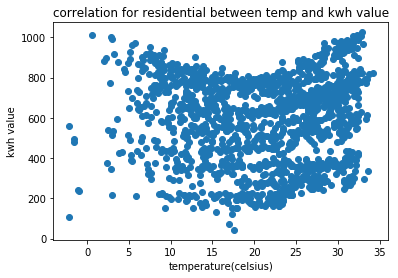

In [174]:
#comm_test=commercial_train_data[commercial_train_data['TMP']]
plt.scatter(commercial_train_data['TMP'],commercial_train_data['0'])
plt.xlabel('temperature(celsius)')
plt.ylabel('kwh value')
plt.title('correlation for residential between temp and kwh value')
commercial_train_data['TMP'].corr(commercial_train_data['0'])

0.4193823017909435


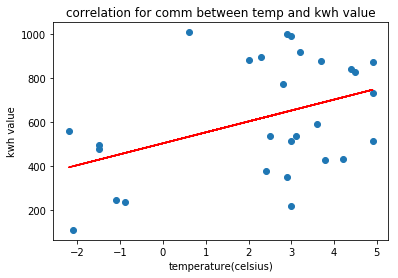

In [175]:
comm_test_below_5=commercial_train_data[commercial_train_data['TMP']<5]
plt.scatter(comm_test_below_5['TMP'],comm_test_below_5['0'])
plt.xlabel('temperature(celsius)')
plt.ylabel('kwh value')
plt.title('correlation for comm between temp and kwh value')
print(comm_test_below_5['TMP'].corr(comm_test_below_5['0']))
m, b = np.polyfit(comm_test_below_5['TMP'], comm_test_below_5['0'], 1)
plt.plot(comm_test_below_5['TMP'], m*comm_test_below_5['TMP'] + b,color='red')

In [177]:
for index,row in comm_test_below_5.iterrows():

        
    if row['0']<600 and row['TMP']<0:
        comm_test_below_5.drop(index,inplace=True)       

-0.1352107188699859


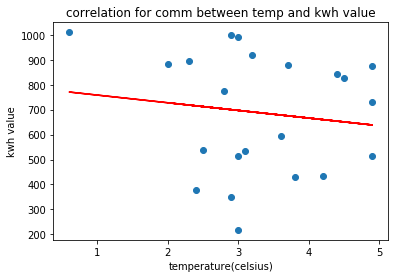

In [178]:
plt.scatter(comm_test_below_5['TMP'],comm_test_below_5['0'])
plt.xlabel('temperature(celsius)')
plt.ylabel('kwh value')
plt.title('correlation for comm between temp and kwh value')
m, b = np.polyfit(comm_test_below_5['TMP'], comm_test_below_5['0'], 1)
plt.plot(comm_test_below_5['TMP'], m*comm_test_below_5['TMP'] + b,color='red')
print(comm_test_below_5['TMP'].corr(comm_test_below_5['0']))


In [221]:
k=6

In [222]:
train_below_5=comm_test_below_5[comm_test_below_5.columns[k:]]
test_below_5=comm_test_below_5['0']
lr_5=LinearRegression()
lr_5.fit(train_below_5,test_below_5)


LinearRegression()

0.09052084939196084


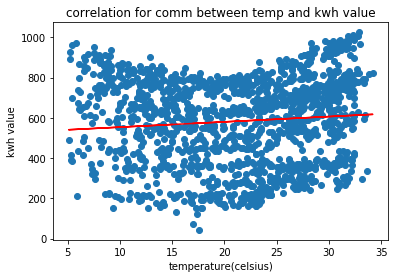

In [223]:
comm_test_more_than_5=commercial_train_data[commercial_train_data['TMP']>5]
plt.scatter(comm_test_more_than_5['TMP'],comm_test_more_than_5['0'])
plt.xlabel('temperature(celsius)')
plt.ylabel('kwh value')
plt.title('correlation for comm between temp and kwh value')
print(comm_test_more_than_5['TMP'].corr(comm_test_more_than_5['0']))
train_above_5=comm_test_more_than_5[comm_test_more_than_5.columns[k:]]
test_above_5=comm_test_more_than_5['0']
lr_above_5=LinearRegression()
lr_above_5.fit(train_above_5,test_above_5)
m, b = np.polyfit(comm_test_more_than_5['TMP'], comm_test_more_than_5['0'], 1)
plt.plot(comm_test_more_than_5['TMP'], m*comm_test_more_than_5['TMP'] + b,color='red')

In [224]:
winter_test_data=commercial_test_data[commercial_test_data.columns[k:]]
winter_data_below_5=winter_test_data[winter_test_data['TMP']<5]
winter_data_above_5=winter_test_data[winter_test_data['TMP']>5]
winter_test_data.head(2)


,TMP
Unnamed: 0,
2021-02-01 00:00:00+00:00,11.7
2021-02-02 00:00:00+00:00,12.1


In [225]:
pred_below_5=lr_5.predict(winter_data_below_5)
pred_above_5=lr_above_5.predict(winter_data_above_5)

In [226]:
a=pred_above_5[:10]
b=pred_below_5
c=pred_above_5[10:]
frames=[a,b,c]
predictions = np.concatenate((a, b,c))
predictions

array([ 558.4429683 ,  559.49381847,  568.95147001,  580.24810934,
        557.65483067,  566.06163204,  561.59551881,  570.26503272,
        564.74806933,  541.36665303,  764.30375814,  807.27222397,
        837.96398527,  920.83174079, 1065.08301892, 1022.1145531 ,
        844.10233753,  844.10233753,  804.20304783,  545.04462862,
        567.37519475,  567.90061984,  574.73114595,  586.29049782,
        563.9599317 ,  559.23110593,  578.93454663,  584.71422257,
        558.4429683 ])

MSE: 13854.11540550042
MAE: 104.69170063888926
0.3322950445113213


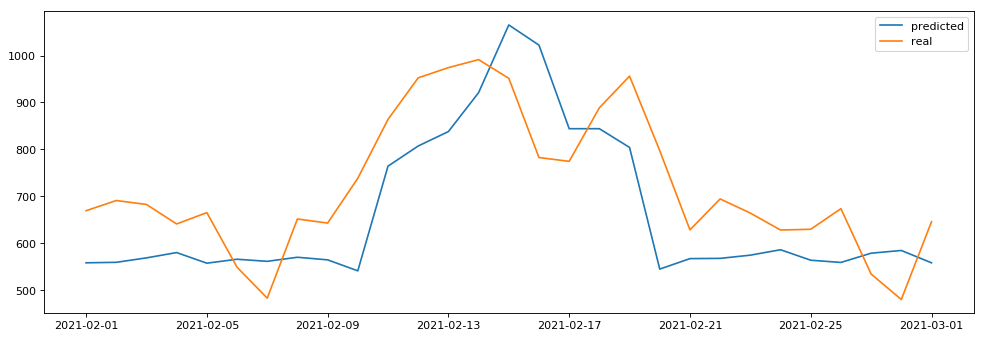

In [227]:
figure(figsize=(15,5), dpi=80)
plt.plot(commercial_test_data.index,predictions,label='predicted')
plt.plot(commercial_test_data.index,commercial_test_data['0'],label='real')
plt.legend()
print(f'MSE:' ,mean_squared_error(commercial_test_data['0'],predictions))
print(f'MAE:' ,mean_absolute_error(commercial_test_data['0'],predictions))
print(r2_score(commercial_test_data['0'],predictions))
plt.show()